### Importing libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# libraries for tuning hyperparameters
from sklearn.model_selection import GridSearchCV , KFold
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [2]:
turbines = pd.read_csv('gas_turbines.csv')
turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
turbines.shape

(15039, 11)

In [4]:
turbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
turbines[turbines.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


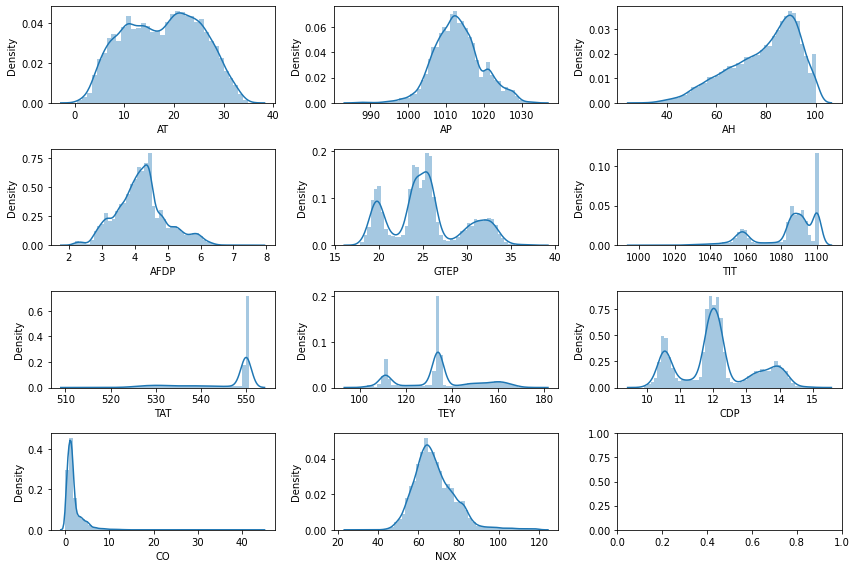

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(12,8))
sns.distplot(turbines.AT, ax=ax[0,0])
sns.distplot(turbines.AP, ax = ax[0,1])
sns.distplot(turbines.AH, ax = ax[0,2])
sns.distplot(turbines.AFDP, ax = ax[1,0])
sns.distplot(turbines.GTEP, ax = ax[1,1])
sns.distplot(turbines.TIT, ax = ax[1,2])
sns.distplot(turbines.TAT, ax = ax[2,0])
sns.distplot(turbines.TEY, ax = ax[2,1])
sns.distplot(turbines.CDP, ax = ax[2,2])
sns.distplot(turbines.CO, ax = ax[3,0])
sns.distplot(turbines.NOX, ax = ax[3,1])
plt.tight_layout()
plt.show()

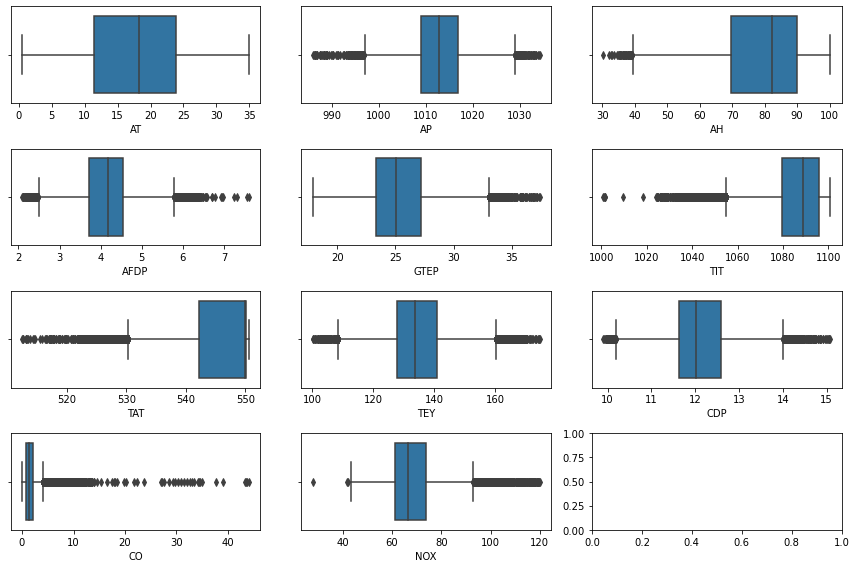

In [7]:
# Check the outliers

fig, ax = plt.subplots(4,3, figsize = (12,8))

sns.boxplot(turbines.AT, ax = ax[0,0])
sns.boxplot(turbines.AP, ax = ax[0,1])
sns.boxplot(turbines.AH, ax = ax[0,2])
sns.boxplot(turbines.AFDP, ax = ax[1,0])
sns.boxplot(turbines.GTEP, ax = ax[1,1])
sns.boxplot(turbines.TIT, ax = ax[1,2])
sns.boxplot(turbines.TAT, ax = ax[2,0])
sns.boxplot(turbines.TEY, ax = ax[2,1])
sns.boxplot(turbines.CDP, ax = ax[2,2])
sns.boxplot(turbines.CO, ax = ax[3,0])
sns.boxplot(turbines.NOX, ax = ax[3,1])
plt.tight_layout()
plt.show()

In [8]:
scale=MinMaxScaler()
turbines1=pd.DataFrame(scale.fit_transform(turbines),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
turbines1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


#### Extracting independent and dependent variables

In [9]:
X = turbines1.drop(axis =0, columns ='TEY').values
Y = turbines1['TEY'].values

In [10]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [11]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [12]:
keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None)
keras.metrics.MeanSquaredError()

In [13]:
# Setting certain fix value of random seed for reproductibility
seed = 7
np.random.seed(seed)

###  Model building

####  Create the model

In [14]:
model = Sequential()
model.add(Dense(12, input_dim =10, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dense(8, kernel_initializer ='uniform', activation ='relu'))
model.add(Dense(1, kernel_initializer ='uniform', activation ='relu'))  


#### Compile the model

In [15]:
model.compile(loss = 'mse', optimizer='adam', metrics=[keras.metrics.MeanSquaredError()]) 

#### Fit the model

In [16]:
history = model.fit(X,Y, validation_split=0.33, epochs =100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 4s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 2/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 3/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 4/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 5/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 7/10

1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 51/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 52/100
1008/1008 [==============================] - 4s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 53/100
1008/1008 [==============================] - 4s 4ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 54/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 55/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 56/100
1008

1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 100/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2241 - val_mean_squared_error: 0.2241


#### Evaluate the model

In [17]:
scores = model.evaluate(X,Y)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 0.2541 - mean_squared_error: 0.2541
mean_squared_error: 25.41%


####  Tuning of Hyperparameter --  Batch size and epochs

In [18]:
# Create model

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim= 10, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(8, kernel_initializer= 'uniform', activation= 'relu'))
    model.add(Dense(1, kernel_initializer= 'uniform', activation='relu')) 
    
    adam = Adam(lr =0.01)
    
    model.compile(loss= 'mse', optimizer= adam, metrics= [keras.metrics.MeanSquaredError()])  
    return model

In [19]:
# Create the model
model= KerasRegressor(build_fn = create_model, verbose = 0)   # the Y variable is a continuous data type where you've to apply the keras regressor model to it

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dicitionary of the grid search parameters
param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.001 total time=  22.9s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  22.1s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  22.1s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  21.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=  22.8s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, 

In [20]:
# Summarize the results

print('Best :{}, using {}'. format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with:{}'. format(mean, stdev, param))

Best :-0.00013898716424591838, using {'batch_size': 20, 'epochs': 50}
-0.00033351727615809067,0.0002744224023318647 with:{'batch_size': 10, 'epochs': 10}
-0.09378231167502235,0.12013293668444004 with:{'batch_size': 10, 'epochs': 50}
-0.044447980714903676,0.08848300177413675 with:{'batch_size': 10, 'epochs': 100}
-0.00018313285399926827,7.170122793053707e-05 with:{'batch_size': 20, 'epochs': 10}
-0.00013898716424591838,4.7968910802465585e-05 with:{'batch_size': 20, 'epochs': 50}
-0.0989730574467103,0.12878933645262783 with:{'batch_size': 20, 'epochs': 100}
-0.1162575913942419,0.14299669726583203 with:{'batch_size': 40, 'epochs': 10}
-0.07990044726175256,0.09869021167742462 with:{'batch_size': 40, 'epochs': 50}
-0.00016553495079278945,7.737896672900084e-05 with:{'batch_size': 40, 'epochs': 100}
